In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd()
path = os.path.join(path, '2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df = pd.read_csv(path)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [5]:
df[df['order_amount'] == df['order_amount'].max()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


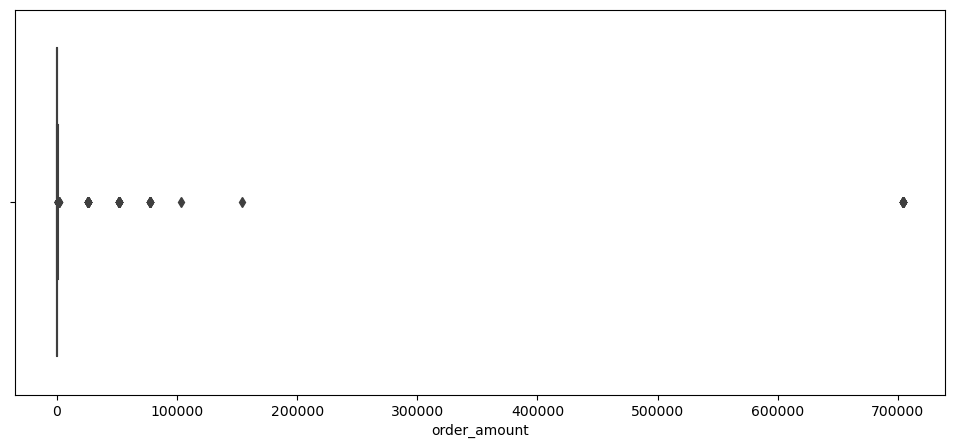

In [6]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x=df['order_amount'])
plt.show()

Given that there are a lot of high valued outliers, it is probably best to utilize the Median as a metric rather than the Mean. Without any extra context I cannot determine whether these high values are due to an input error or whether these high values are correct.

In [7]:
df['order_amount'].median()

284.0

Another potential method is to remove these potential outliers and then calculate the mean. I can use the IQR*1.5 to determine potential outliers and then calculate the mean with the new values 

In [8]:
IQR = 390 - 163
lower = 163 - (IQR*1.5)

upper = 390 + (IQR*1.5)
removed_outliers = df[(df['order_amount'] > lower) & (df['order_amount'] < upper)]
removed_outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [9]:
removed_outliers['order_amount'].mean()

293.7153735336489

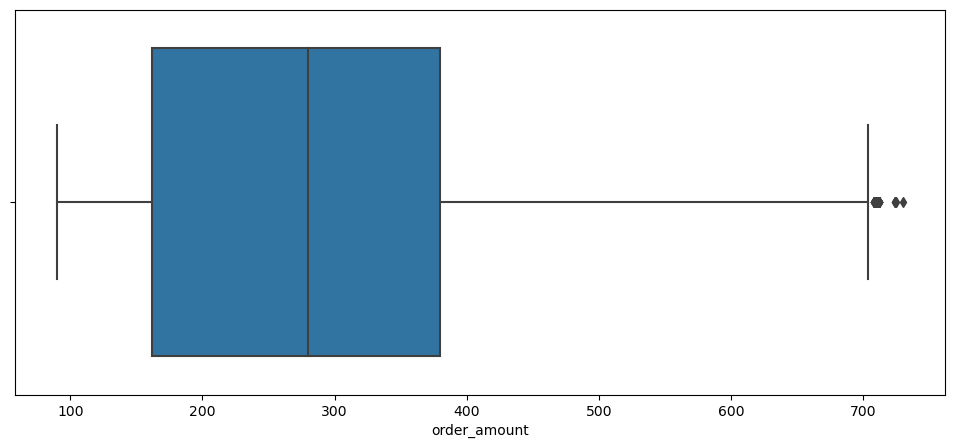

In [13]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x=removed_outliers['order_amount'])
plt.show()

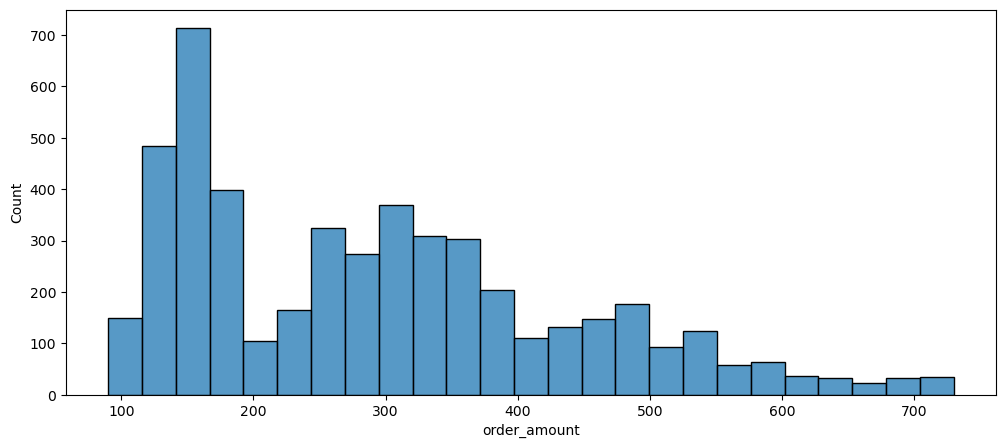

In [14]:
fig = plt.figure(figsize=(12,5))
sns.histplot(x=removed_outliers['order_amount'])
plt.show()